## Import Libraries

In [1]:
import pandas as pd
import nltk,re,string
import tensorflow
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
import keras
warnings.filterwarnings("ignore", category=RuntimeWarning)

Using TensorFlow backend.


In [2]:
xtrain=pd.read_csv('./x_train.csv')
xtest=pd.read_csv('./x_test.csv')
ytrain=pd.read_csv('./y_train.csv')
ytest=pd.read_csv('./y_test.csv')

## Prep data

In [3]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [4]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(xtrain['clean_text'])
xtrain_seq=tokenizer.texts_to_sequences(xtrain['clean_text'])
xtest_seq=tokenizer.texts_to_sequences(xtest['clean_text'])

In [5]:
xtrain_seqpadded=pad_sequences(xtrain_seq,50)
xtest_seqpadded=pad_sequences(xtest_seq,50)

## Build 

In [10]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Embedding

In [11]:
model=Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,32))
model.add(LSTM(32,dropout=0,recurrent_dropout=0))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          230016    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 239,425
Trainable params: 239,425
Non-trainable params: 0
_________________________________________________________________


In [16]:
import keras.backend as K
def recall_m(ytrue,ypred):
    truepos=K.sum(K.round(K.clip(ytrue*ypred,0,1)))
    possiblepos=K.sum(K.round(K.clip(ytrue,0,1)))
    recall=truepos/(possiblepos+K.epsilon())
    return recall
def precision_m(ytrue,ypred):
    truepos=K.sum(K.round(K.clip(ytrue*ypred,0,1)))
    predictedpos=K.sum(K.round(K.clip(ypred,0,1)))
    precision=truepos/(predictedpos+K.epsilon())
    return precision
    

In [17]:

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',precision_m,recall_m])

In [20]:
hist=model.fit(xtrain_seqpadded,ytrain['label'],batch_size=32,epochs=10,
              validation_data=(xtest_seqpadded,ytest))

Instructions for updating:
Use tf.cast instead.
Train on 4457 samples, validate on 1115 samples
Epoch 1/10
4457/4457 [==============================] - 19s 4ms/step - loss: 0.3048 - accuracy: 0.9011 - precision_m: 0.4220 - recall_m: 0.3661 - val_loss: 0.0681 - val_accuracy: 0.9812 - val_precision_m: 1.0000 - val_recall_m: 0.8585racy: 0.8838 - precision_m:
Epoch 2/10
4457/4457 [==============================] - 18s 4ms/step - loss: 0.0430 - accuracy: 0.9883 - precision_m: 0.9831 - recall_m: 0.9345 - val_loss: 0.0510 - val_accuracy: 0.9839 - val_precision_m: 1.0000 - val_recall_m: 0.8740
Epoch 3/10
4457/4457 [==============================] - 49s 11ms/step - loss: 0.0181 - accuracy: 0.9953 - precision_m: 0.9712 - recall_m: 0.9531 - val_loss: 0.0718 - val_accuracy: 0.9830 - val_precision_m: 1.0000 - val_recall_m: 0.8669
Epoch 4/10
4457/4457 [==============================] - 282s 63ms/step - loss: 0.0063 - accuracy: 0.9987 - precision_m: 0.9986 - recall_m: 0.9881 - val_loss: 0.0333 - val_

## Visualise the results

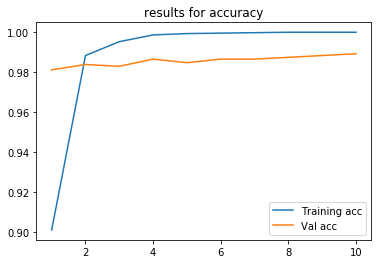

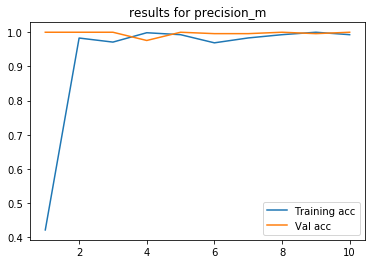

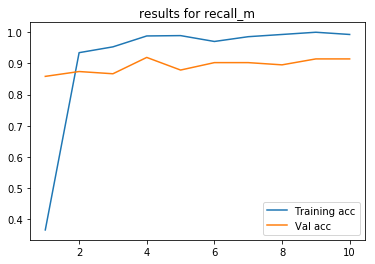

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in ['accuracy','precision_m','recall_m']:
    acc=hist.history[i]
    val_acc=hist.history['val_{}'.format(i)]
    epochs=range(1,len(acc)+1
                )
    plt.figure()
    plt.plot(epochs,acc,label='Training acc')
    plt.plot(epochs,val_acc,label='Val acc')
    plt.title('results for {}'.format(i))
    plt.legend()
    plt.show()